In [12]:
import numpy as np
from pathlib import Path
import h5py 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal

datapath = Path.home()/'group'/'project'/'datasets'/'data'
file = '220922_dl_grid_data_85to90deg_18575to18580ev_5mm.h5'

In [3]:
h5file = h5py.File(datapath/file, 'r')

In [4]:
h5file.keys()

<KeysViewHDF5 ['meta', 'x']>

In [5]:
h5file['x'].shape

(252424, 8192)

In [13]:
x = h5file['x'][0, :]

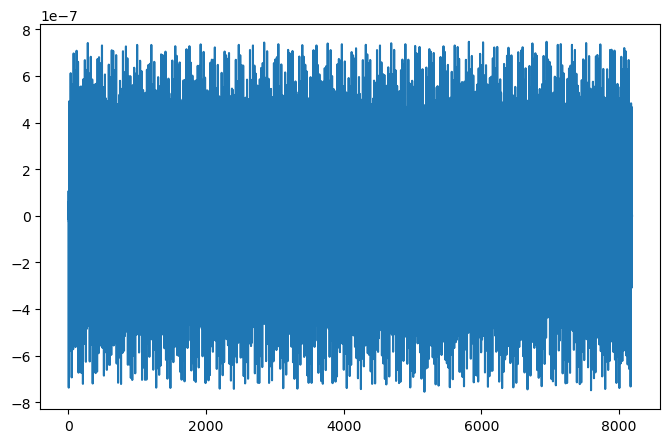

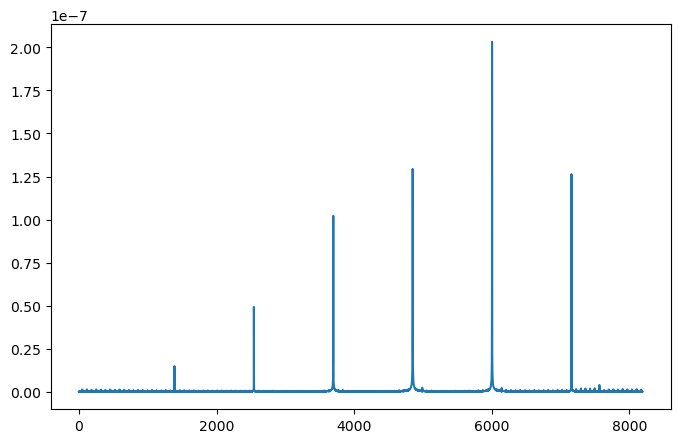

In [14]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

ax.plot(x.real)

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

ax.plot(abs(np.fft.fftshift(np.fft.fft(x, norm='forward'))))

# convolution using fft convolve

1.0158851762718586e-09
4073


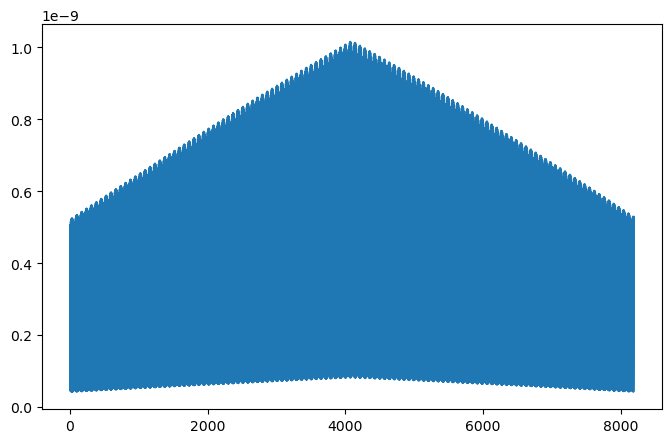

In [24]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

ax.plot(abs(signal.convolve(x, x, mode='same')))

print(np.max(abs(signal.convolve(x, x, mode='same'))))
print(np.argmax(abs(signal.convolve(x, x, mode='same'))))

# convolution theorem with no zero padding - circular convolution

1.014890861712793e-09
4072
9.003438918411411e-11


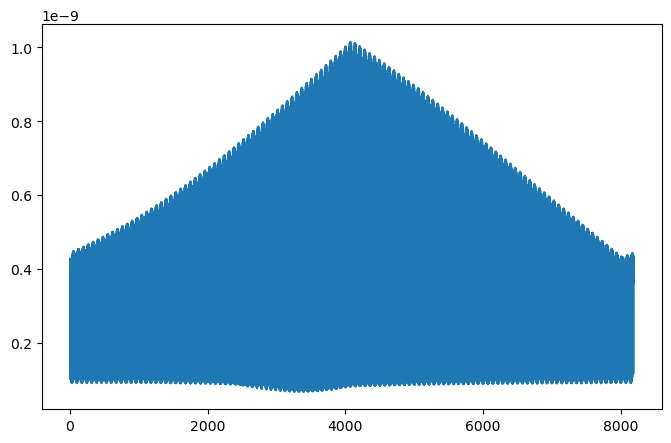

In [43]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

ax.plot(abs(np.fft.ifftshift(np.fft.ifft(np.fft.fft(x) * np.fft.fft(x)))))

print(np.max(abs(np.fft.ifftshift(np.fft.ifft(np.fft.fft(x) * np.fft.fft(x))))))
print(np.argmax(np.fft.ifftshift(abs(np.fft.ifft(np.fft.fft(x) * np.fft.fft(x))))))

print(abs(np.fft.ifftshift(np.fft.ifft(np.fft.fft(x) * np.fft.fft(x)))[4096]))

# convolution theorem with zero padding - full convolution

1.0158851762718582e-09 4072


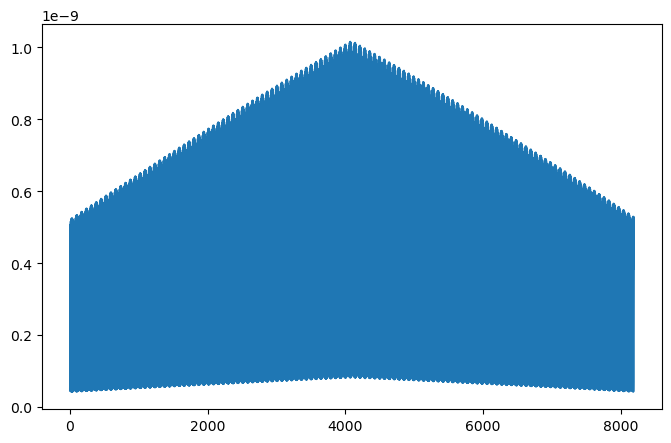

In [35]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

y = np.concatenate((x, np.zeros(8192, dtype=np.complex128)))
y = abs(np.fft.ifft(np.fft.fft(y) * np.fft.fft(y)))[4096:4096+8192] # slicing to guarantee same size

ax.plot(y)
print(np.max(y), np.argmax(y)) # identical to signal.convolve

# inner product in the frequency domain

Identical:  1.0746199044487262e-09
Shifted by pi:  1.0746199044487262e-09


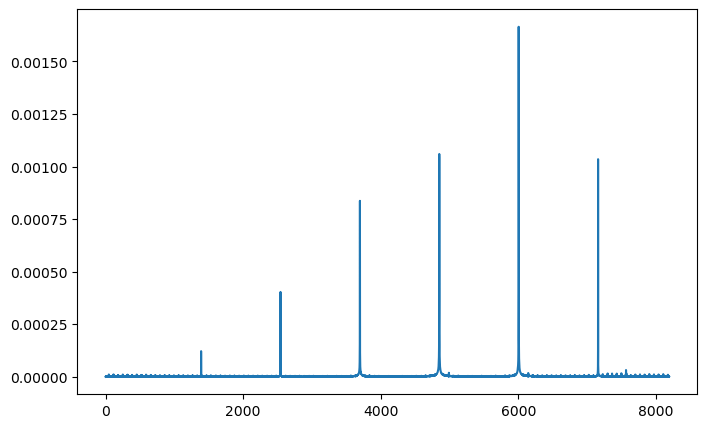

In [41]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

plt.plot(abs(np.fft.fftshift(np.fft.fft(x))))
print('Identical: ', abs(np.vdot(np.fft.fft(x, norm='ortho'), np.fft.fft(x, norm='ortho'))))
print('Shifted by pi: ', abs(np.vdot(np.exp(1j*np.pi)*np.fft.fft(x, norm='ortho'), np.fft.fft(x, norm='ortho'))))

# inner product in the time domain

1.0746199044487255e-09


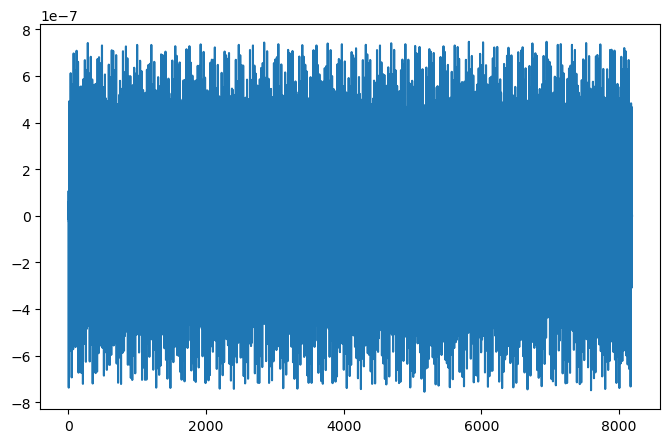

In [50]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

plt.plot(x.real)

print(abs(np.vdot(x,x*np.exp(1j*np.pi/2))))